In [5]:
# Loading the necessary libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)


person_age 	Age of the person 	Float
person_gender 	Gender of the person 	Categorical
person_education 	Highest education level 	Categorical
person_income 	Annual income 	Float
person_emp_exp 	Years of employment experience 	Integer
person_home_ownership 	Home ownership status (e.g., rent, own, mortgage) 	Categorical
loan_amnt 	Loan amount requested 	Float
loan_intent 	Purpose of the loan 	Categorical
loan_int_rate 	Loan interest rate 	Float
loan_percent_income 	Loan amount as a percentage of annual income 	Float
cb_person_cred_hist_length 	Length of credit history in years 	Float
credit_score 	Credit score of the person 	Integer
previous_loan_defaults_on_file 	Indicator of previous loan defaults 	Categorical
loan_status (target variable) 	Loan approval status: 1 = approved; 0 = rejected 	Integer

In [3]:
data <- read.csv("loan_data.csv")
head(data)
summary(data)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>
1,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
2,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
3,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
4,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
5,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
6,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1


   person_age     person_gender      person_education   person_income    
 Min.   : 20.00   Length:45000       Length:45000       Min.   :   8000  
 1st Qu.: 24.00   Class :character   Class :character   1st Qu.:  47204  
 Median : 26.00   Mode  :character   Mode  :character   Median :  67048  
 Mean   : 27.76                                         Mean   :  80319  
 3rd Qu.: 30.00                                         3rd Qu.:  95789  
 Max.   :144.00                                         Max.   :7200766  
 person_emp_exp   person_home_ownership   loan_amnt     loan_intent       
 Min.   :  0.00   Length:45000          Min.   :  500   Length:45000      
 1st Qu.:  1.00   Class :character      1st Qu.: 5000   Class :character  
 Median :  4.00   Mode  :character      Median : 8000   Mode  :character  
 Mean   :  5.41                         Mean   : 9583                     
 3rd Qu.:  8.00                         3rd Qu.:12237                     
 Max.   :125.00                 

In [3]:
data[, "person_gender"] <- as.factor(data[, "person_gender"])
data[, "person_education"] <- as.factor(data[, "person_education"])
data[, "person_home_ownership"] <- as.factor(data[, "person_home_ownership"])
data[, "loan_intent	"] <- as.factor(data[, "loan_intent"])
data[, "previous_loan_defaults_on_file"] <- as.factor(data[, "previous_loan_defaults_on_file"])
data[, "loan_status"] <- as.factor(data[, "loan_status"])

In [4]:
summary(data)

   person_age     person_gender     person_education person_income    
 Min.   : 20.00   female:20159   Associate  :12028   Min.   :   8000  
 1st Qu.: 24.00   male  :24841   Bachelor   :13399   1st Qu.:  47204  
 Median : 26.00                  Doctorate  :  621   Median :  67048  
 Mean   : 27.76                  High School:11972   Mean   :  80319  
 3rd Qu.: 30.00                  Master     : 6980   3rd Qu.:  95789  
 Max.   :144.00                                      Max.   :7200766  
 person_emp_exp   person_home_ownership   loan_amnt     loan_intent       
 Min.   :  0.00   MORTGAGE:18489        Min.   :  500   Length:45000      
 1st Qu.:  1.00   OTHER   :  117        1st Qu.: 5000   Class :character  
 Median :  4.00   OWN     : 2951        Median : 8000   Mode  :character  
 Mean   :  5.41   RENT    :23443        Mean   : 9583                     
 3rd Qu.:  8.00                         3rd Qu.:12237                     
 Max.   :125.00                         Max.   :35000

In [5]:
sum(is.na(data))  # Đếm tổng số giá trị NA trong toàn bộ dataframe


[1] 0

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in rm(g1, g2, g3, g4, g5, g6, g7, g8):
“objet 'g1' introuvable”
Warning message in rm(g1, g2, g3, g4, g5, g6, g7, g8):
“objet 'g2' introuvable”


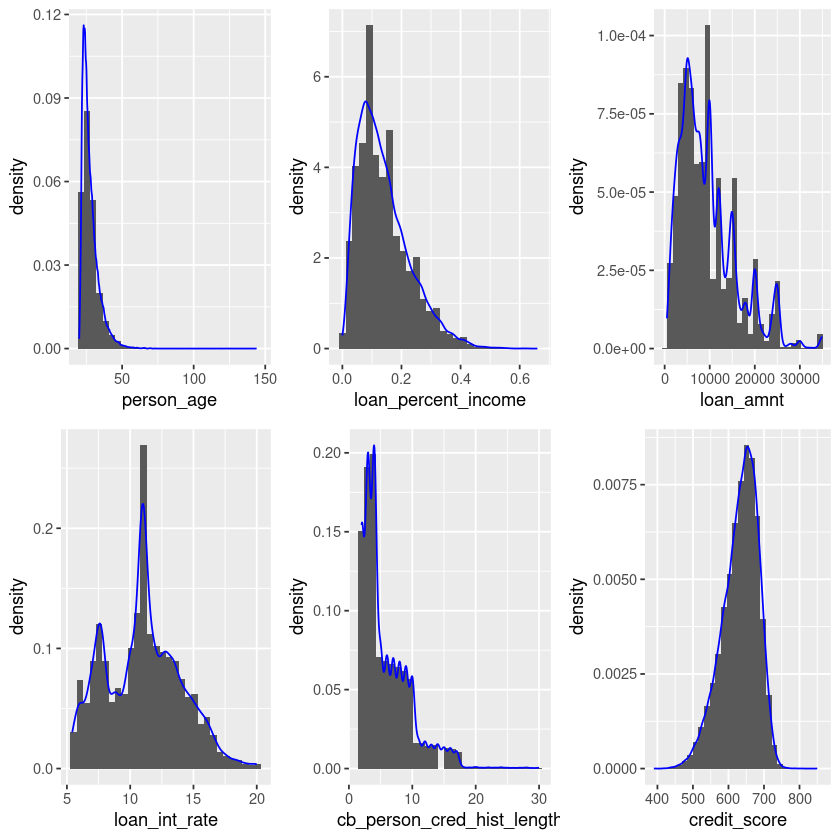

In [6]:
g3<-ggplot(data,aes(x=person_age))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(data,aes(x=loan_percent_income))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(data,aes(x=loan_amnt))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(data,aes(x=loan_int_rate))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(data,aes(x=cb_person_cred_hist_length))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(data,aes(x=credit_score))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g3,g4,g5,g6,g7,g8,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8)

In [7]:
data[, "person_age"] <- log(data[, "person_age"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


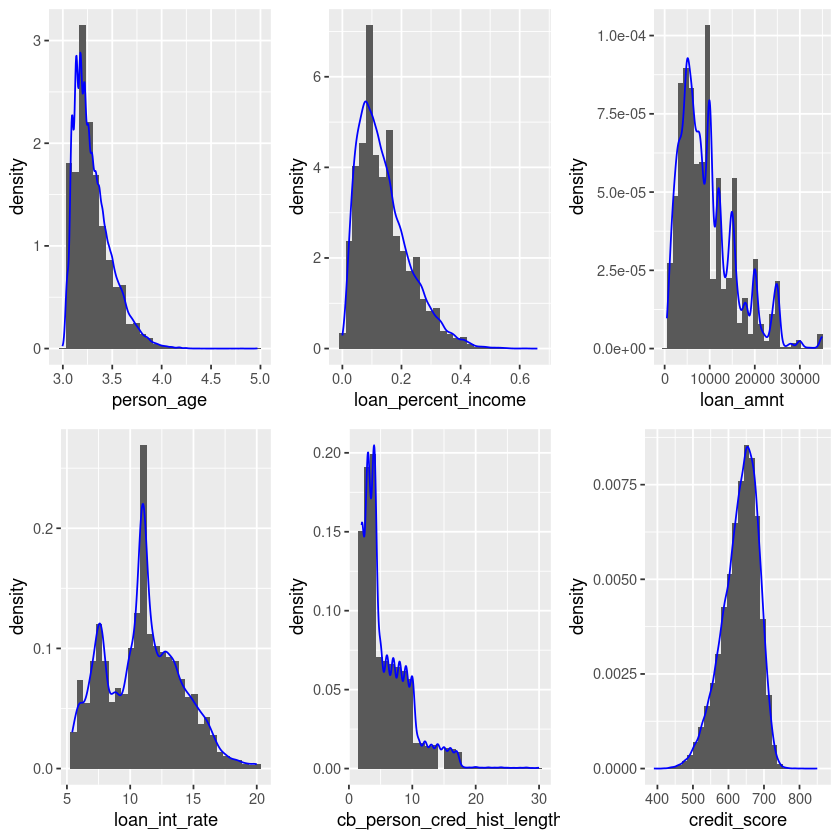

In [8]:
g3<-ggplot(data,aes(x=person_age))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(data,aes(x=loan_percent_income))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(data,aes(x=loan_amnt))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(data,aes(x=loan_int_rate))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(data,aes(x=cb_person_cred_hist_length))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(data,aes(x=credit_score))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g3,g4,g5,g6,g7,g8,ncol=3)
rm(g3,g4,g5,g6,g7,g8)

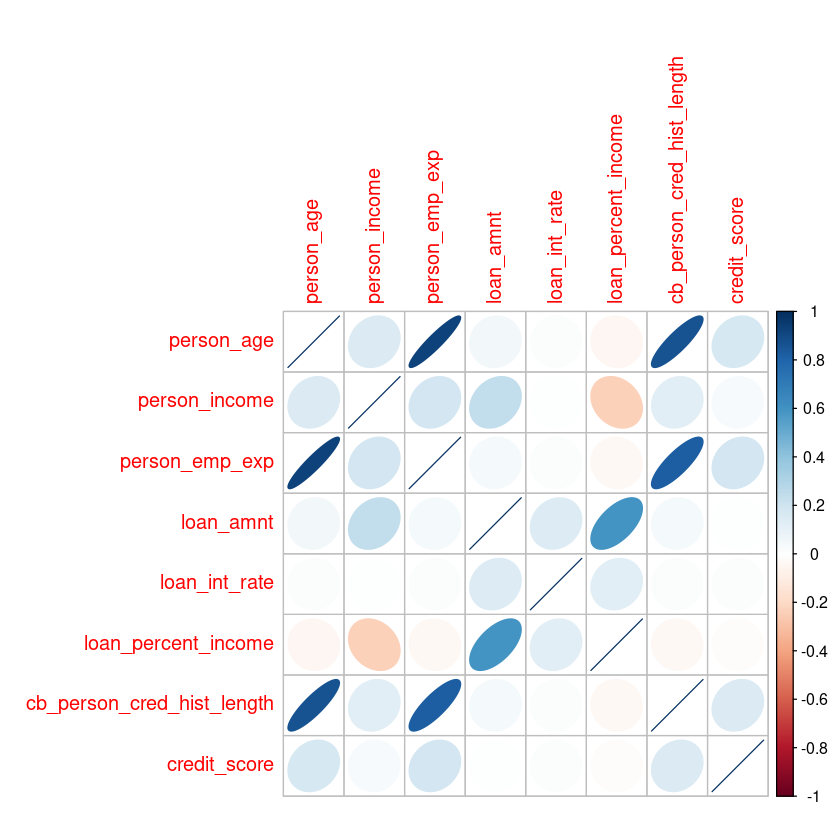

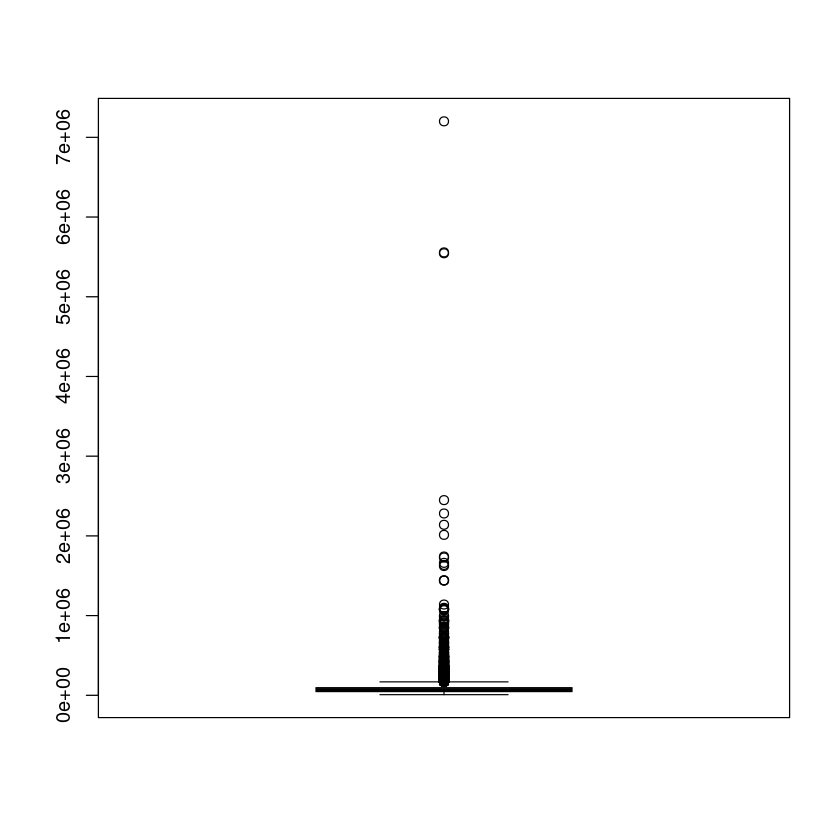

In [9]:
library(corrplot)
corrplot(cor(data[,c(1,4,5,7,9,10,11,12)]),method="ellipse")
boxplot(data[4])

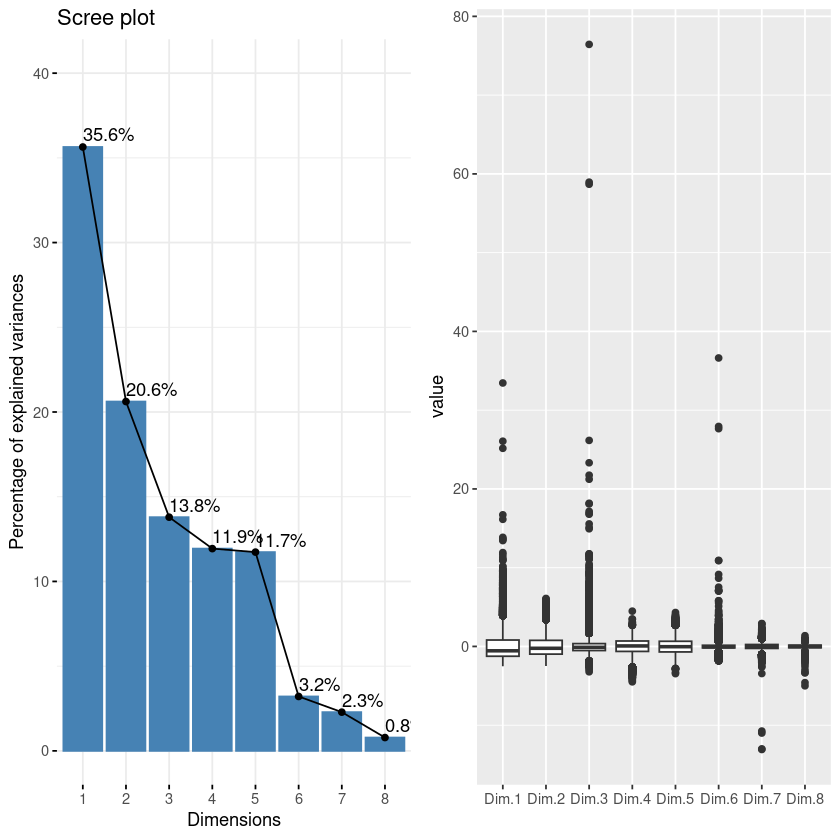

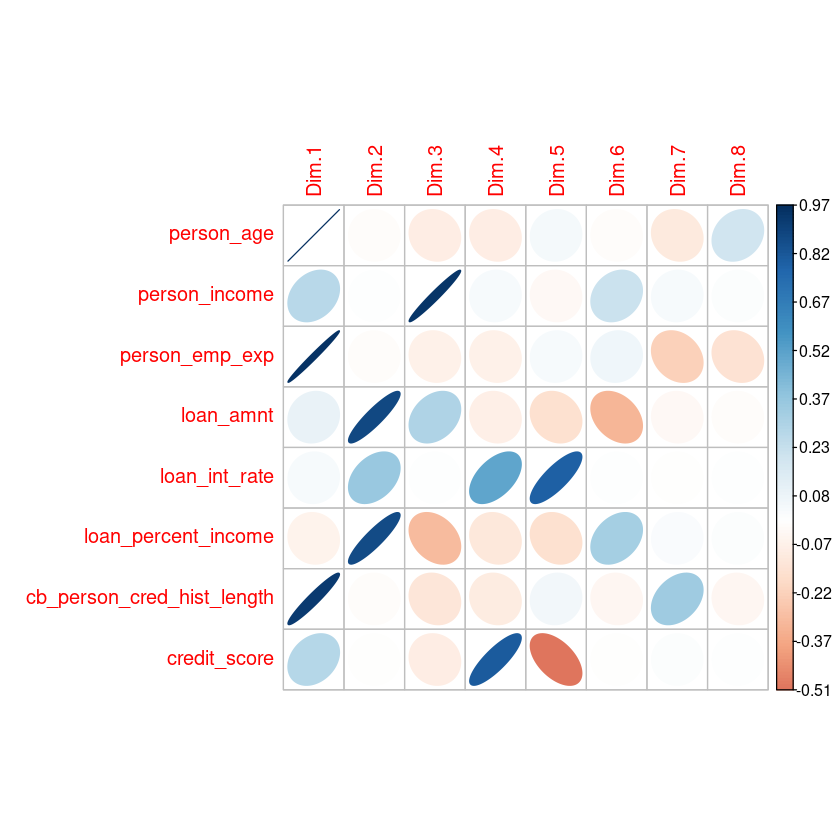

In [10]:
library(FactoMineR)
acp <- PCA(data[, c(1,4,5,7,9,10,11,12)], scale.unit = TRUE,
           graph = FALSE, ncp = 8)
# Eigenvalue decay
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
library(corrplot)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

In [4]:
barplot(data[person_age])

ERROR: Error in eval(expr, envir, enclos): objet 'person_age' introuvable
